# Scattering properties using Mie Theory

In this notebook we provide some examples showing how NemesisPy can be used to calculate the scattering properties of aerosols. In particular, the calculations of the extinction coefficient, single scattering albedo and phase functions are performed using the miepython library. These calculations for a single particle size are integrated following the equations from Hansen and Travis (1974) to derive the effective properties for different particle size distributions.

These calculations are analogous to those performed by the *Makephase* program of the Fortran version of NEMESIS.

In [1]:
#Importing libraries
from NemesisPy import *
import numpy as np
import matplotlib.pyplot as plt

## Reading the refractive indices from the dictionary

First of all, we need to define the refractive index of the aerosol we want to model. NemesisPy includes a dictionary of different aerosols, but it might not include the one you want to study. In that case, you can add yourself the refractive index of a new aerosol type in the file *Data/aerosol_data.py*.

Let's look at reading and plotting the refractive index for Mars' dust particles (ID=1).

Text(0, 0.5, 'Refractive index')

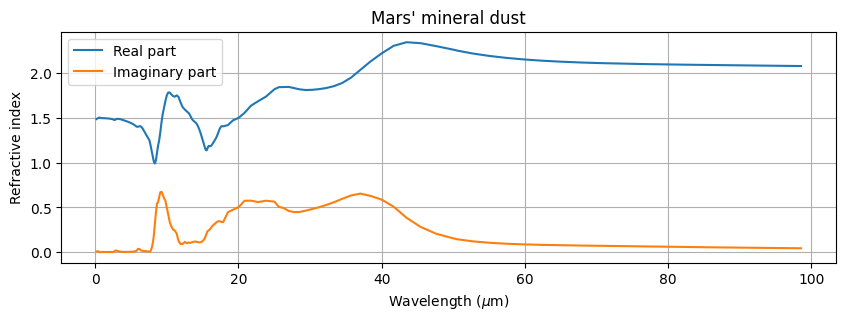

In [2]:
#First we initialise the Scatter class
Scatter = Scatter_0()

Scatter.read_refind(1)  #Reading the refractive index from the dictionary

fig,ax1 = plt.subplots(1,1,figsize=(10,3))
ax1.plot(Scatter.WAVER,Scatter.REFIND_REAL,label='Real part')
ax1.plot(Scatter.WAVER,Scatter.REFIND_IM,label='Imaginary part')
ax1.legend()
ax1.grid()
ax1.set_title("Mars' mineral dust")
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Refractive index')

## Calculating the scattering properties for a single particle size

Now that we have defined the refractive index in the Scatter class, we can calculate the scattering properties for different particle size distributions. In this first case, we simply calculate the scattering properties of Mars' dust particles with a single size (r = 1.5 $\mu$m). This calculation is performed using the miescat function. More information about this function can be seen if typing *help(Scatter.miescat)* in the Python terminal.

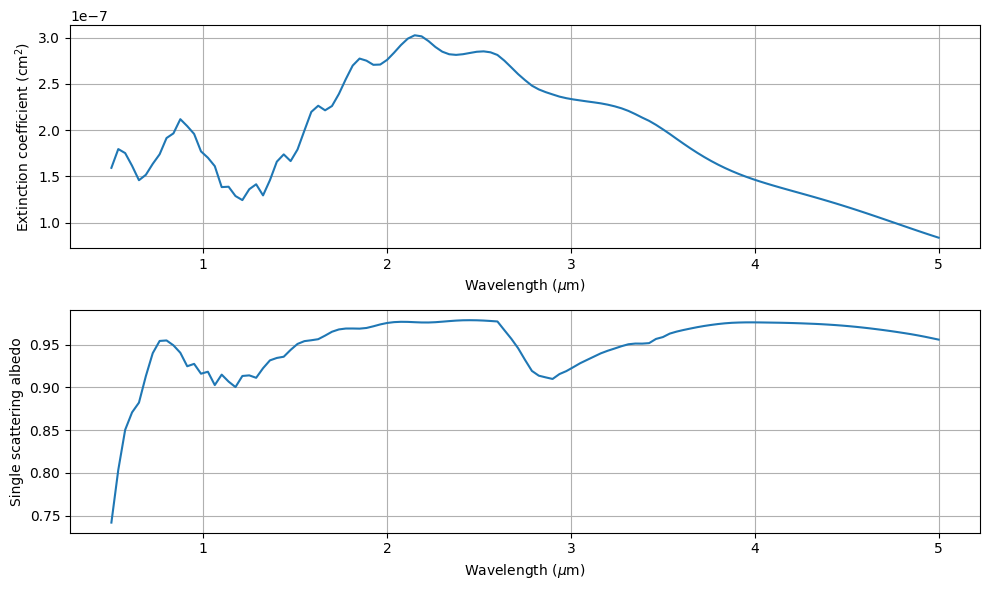

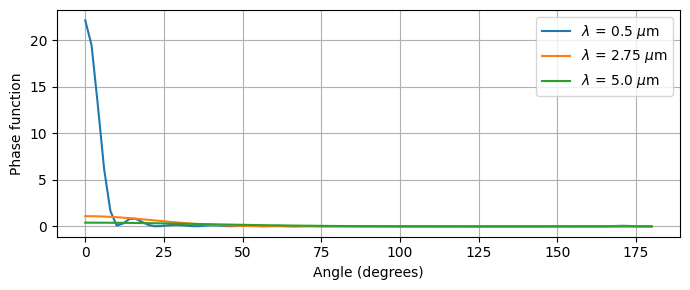

In [3]:
#First of all we need to define our wavelength or wavenumber array 
#and tell the class in what units we want these calculations (wavenumber in cm-1 (ISPACE=0) or wavelength in um (ISPACE=1))
Scatter.ISPACE = 1 #Wavelength

NDUST = 4      #Number of aerosol populations that we want to include in our atmosphere
NWAVE = 121    #Number of spectral points
NTHETA = 91    #Number of phase angles for defining the phase function
wavel = np.linspace(0.5,5.,NWAVE)
theta = np.linspace(0.,180.,NTHETA)

#Now we initialise the arrays that will be filled with the calculations
Scatter.initialise_arrays(NDUST,NWAVE,NTHETA)
Scatter.WAVE = wavel
Scatter.THETA = theta

#Now we perform the calculations
IDUST = 0          #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 0         #Distribution type (0 - Single particle size)
pardist = [1.5]    #Particle size in microns
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



## Calculating the scattering properties for a log-normal distribution

Similarly, we can calculate the scattering properties for a log-normal distribution using the same $miescat$ function. In this example, we calculate the scattering properties for a log-normal distribution with $r_g$ = 1.0 $\mu$m and $\sigma_g$ = 0.316.

The formulation of the log-normal distribution used in NemesisPy follows 

\begin{equation}
n(r) = \dfrac{1}{\sigma_g r \sqrt{2\pi}} \exp \left( \dfrac{-(\ln{r} - \ln{r_g})^2}{2 \sigma_g^2} \right),
\end{equation}

where $r_g$ is the median of the distribution and $\sigma_g$ is the standard deviation (Travis and Hunten, 1974). The mean of the distribution is related to the median by $\mu$ = $\ln{r_g}$, or similarly, $r_g$ = e$^\mu$. Simiarly, we can relate these parameters to the effective radius and variance following

\begin{equation}
r_g = r_{\mathrm{eff}}/(1+\nu_{\mathrm{eff}})^{5/2},
\end{equation}

\begin{equation}
\sigma_g^2 = \ln{(1+\nu_{\mathrm{eff}})},
\end{equation}

as indicated in page 558 of Travis and Hunten (1974).

miescat :: Boundaries of the particle size distribution are  0.16975613137618073 and 5.890803422642211
miescat :: The maximum of the particle size distribution is at  0.9049677240059614
miescat :: Number of single particle sizes to calculate for the integration of the distribution is  63


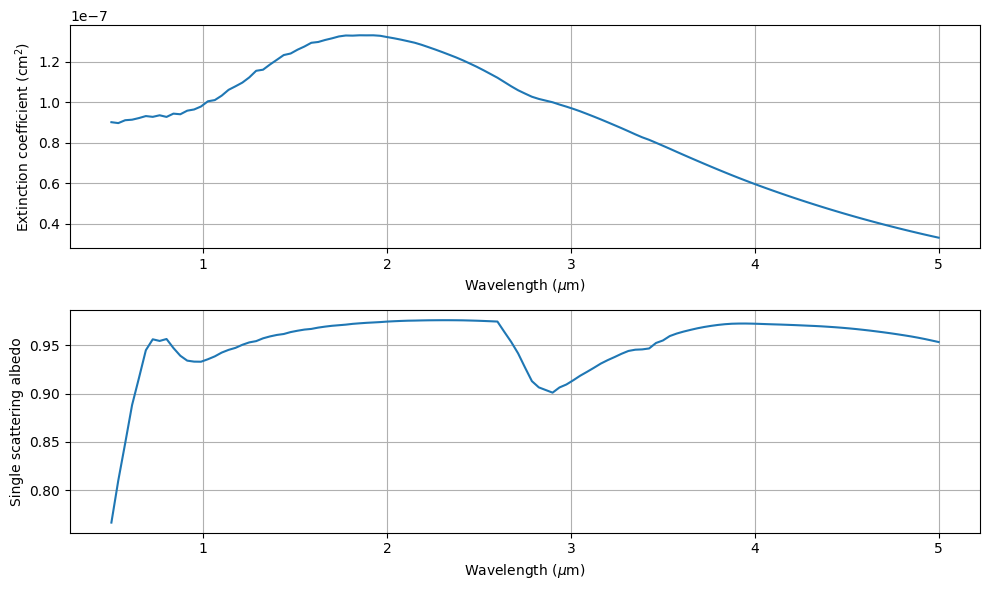

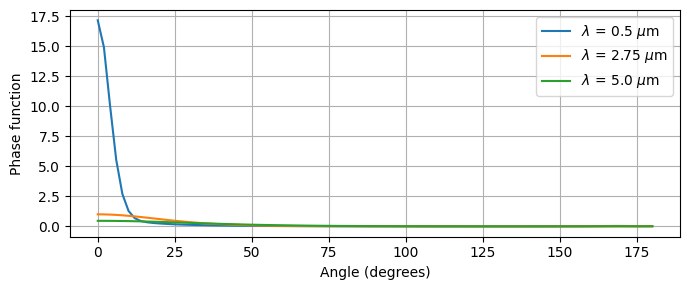

In [4]:
IDUST = 1                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 1               #Distribution type (1 - Log-normal distribution)
pardist = [1.0,0.316]    #Median radius (r_g) and standard deviation (sigma_g)
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



## Calculating the scattering properties for a standard gamma distribution

Similarly, we can calculate the scattering properties for a standard gamma distribution using the same $miescat$ function. In this example, we calculate the scattering properties for a standard gamma distribution with $a$ = $r_{\mathrm{eff}}$ = 1.0 $\mu$m and $b$ = $\nu_{\mathrm{eff}}$ = 0.3. However, in this case we are going to calculate it for CO$_2$ ice particles (ID = 3), in order to show how different aerosol populations in the class can correspond to different aerosol types.

The standard gamma distribution in NemesisPy is calculated following

\begin{equation}
n(r) = r^{(1-3b)/b} e^{-r/ab}.
\end{equation}

miescat :: Boundaries of the particle size distribution are  0.0001 and 5.1500897
miescat :: The maximum of the particle size distribution is at  0.10000000000000009


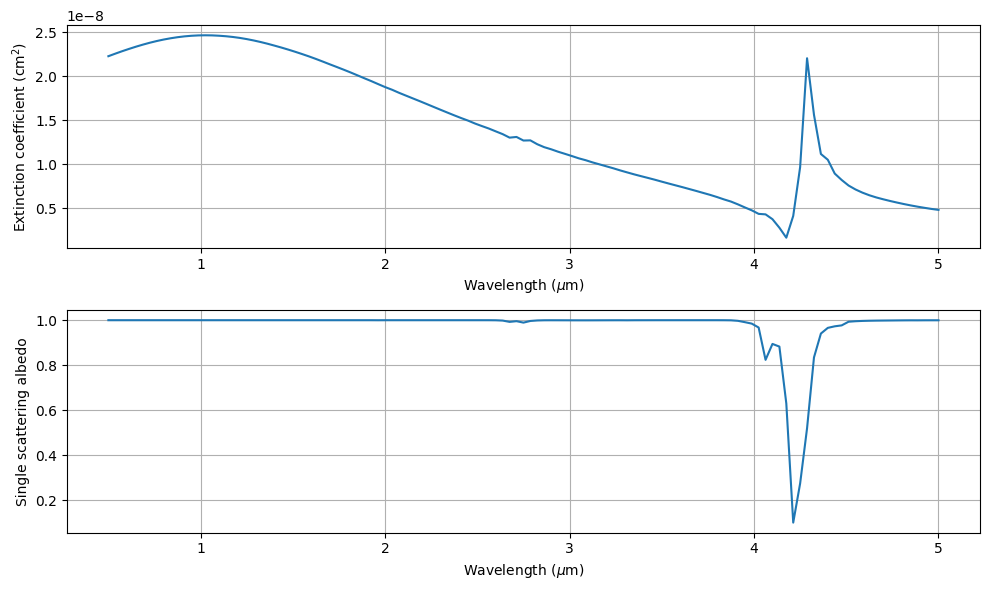

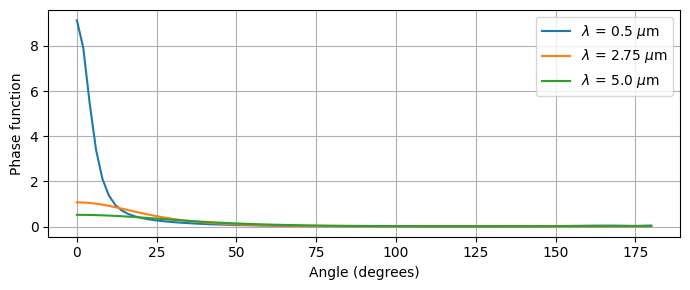

In [5]:
#First we update the refractive index
Scatter.read_refind(3)  #ID = 3 is CO2 ice

#Now we simply perform the calculations, as all the other arrays are already defined
IDUST = 2                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = 2               #Distribution type (2 - Standard gamma distribution)
pardist = [1.0,0.3]      #a and b
Scatter.miescat(IDUST,psdist,pardist)

#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



## Calculating the scattering properties for any user-defined distribution

Alternatively, users may want to use particle size distributions not pre-defined in the miescat function. In that case, it is also possible to perform the calculations for a user-defined distribution. 

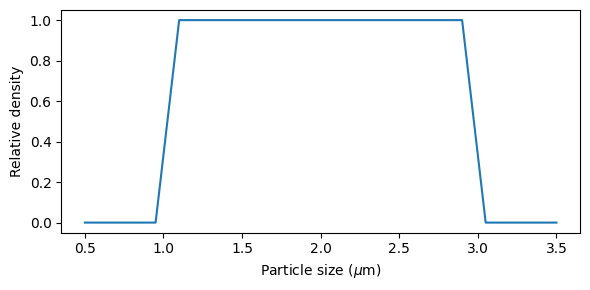

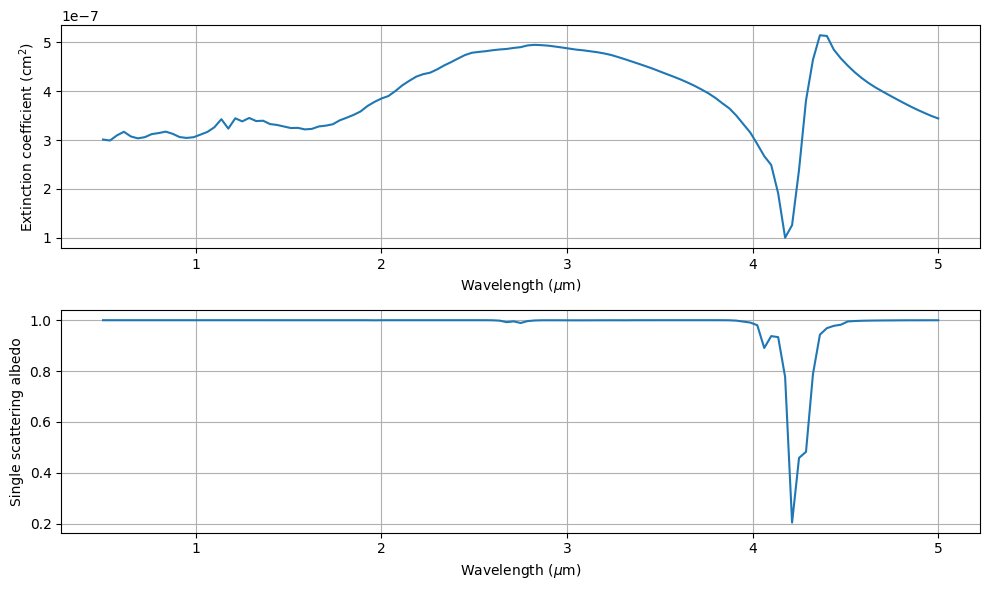

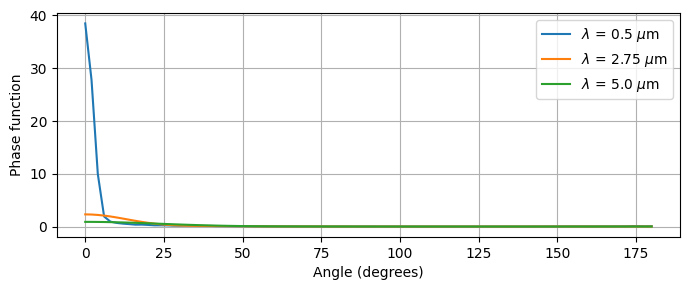

In [6]:
#We first define our particle size distribution
rd = np.linspace(0.5,3.5,21)
Nd = np.zeros(21)
iin = np.where( (rd>=1.) & (rd<=3.) )
Nd[iin] = 1.

fig,ax1 = plt.subplots(1,1,figsize=(6,3))
ax1.plot(rd,Nd)
ax1.set_xlabel('Particle size ($\mu$m)')
ax1.set_ylabel('Relative density')
plt.tight_layout()

#Now we perform the calculations
IDUST = 3                #Aerosol population for which the calculations must be performed (from 0 to NDUST - 1)
psdist = -1              #Distribution type (-1 - User-defined distribution)
pardist = []             #Empty array
Scatter.miescat(IDUST,psdist,pardist,rdist=rd,Ndist=Nd)


#Plotting the extinction coefficient and single scattering albedo
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))

ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
ax1.grid()
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax1.set_xlabel('Wavelength ($\mu$m)')

ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax2.grid()
ax2.set_ylabel('Single scattering albedo')
ax2.set_xlabel('Wavelength ($\mu$m)')
plt.tight_layout()

#Plotting the phase function for three wavelengths
fig,(ax1) = plt.subplots(1,1,figsize=(7,3))

iwave = 0
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = int(Scatter.NWAVE/2)
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
iwave = Scatter.NWAVE - 1
ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST],label='$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax1.grid()
ax1.legend()
plt.tight_layout()



## Reading the scattering properties from input files

In this section, we look at how the different fields in the Scatter class can be filled by reading the input files with the standard formatting required by NEMESIS:

- The *.xsc* file includes information about the extinction coefficient and single scattering albedo. 

- The *PHASEx.DAT* files include the information about the phase function for each of the aerosol populations. 

- The *hgphasex.dat* files also includes the parameters representing a double Henyey-Greenstein phase function. In particular, the phase function is computed using:
\begin{equation}
P(\phi) = f \cdot P_{HG}(g_1,\phi) + (1-f) \cdot P_{HG}(g_2,\phi)
\end{equation}
where $P(\phi)$ is the phase function at a given angle, $P_{HG}(g_i,\phi)$ represent the two Henyey-Greenstein functions, and $f$ represents the relative weight of these two functions. In particular, the Henyey-Greenstein function is given by 
\begin{equation}
P_{HG}(g,\phi) = \dfrac{1}{4\pi} \dfrac{1 - g^2}{(1 - 2g cos\phi + g^2)^3/2}
\end{equation}

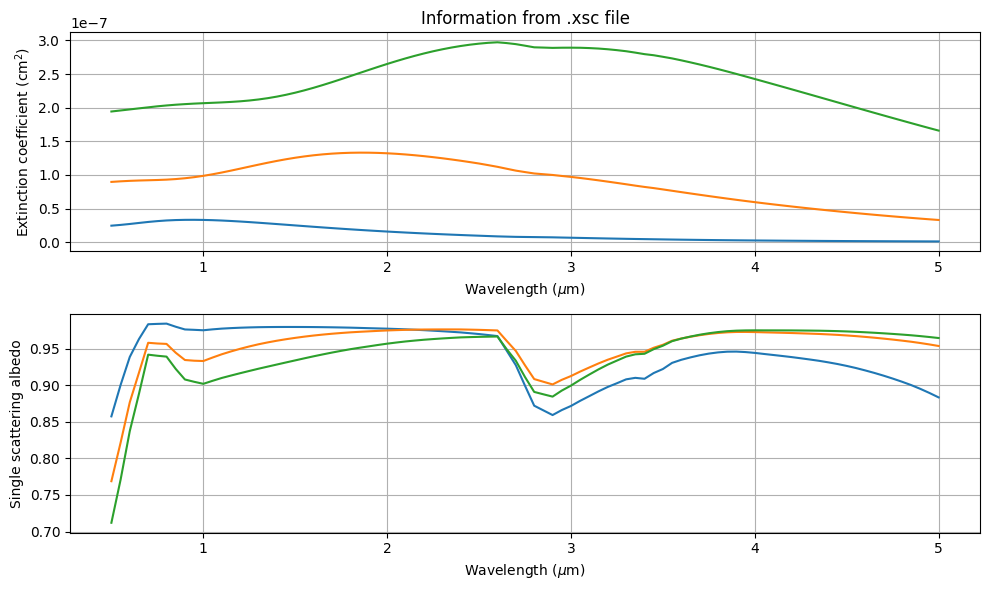

In [7]:
#Reading the .xsc file
Scatter = Scatter_0()
Scatter.read_xsc('marsdust')

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
for IDUST in range(Scatter.NDUST):
    ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
    ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax1.grid()
ax2.grid()
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax2.set_ylabel('Single scattering albedo')
ax1.set_title('Information from .xsc file')
plt.tight_layout()

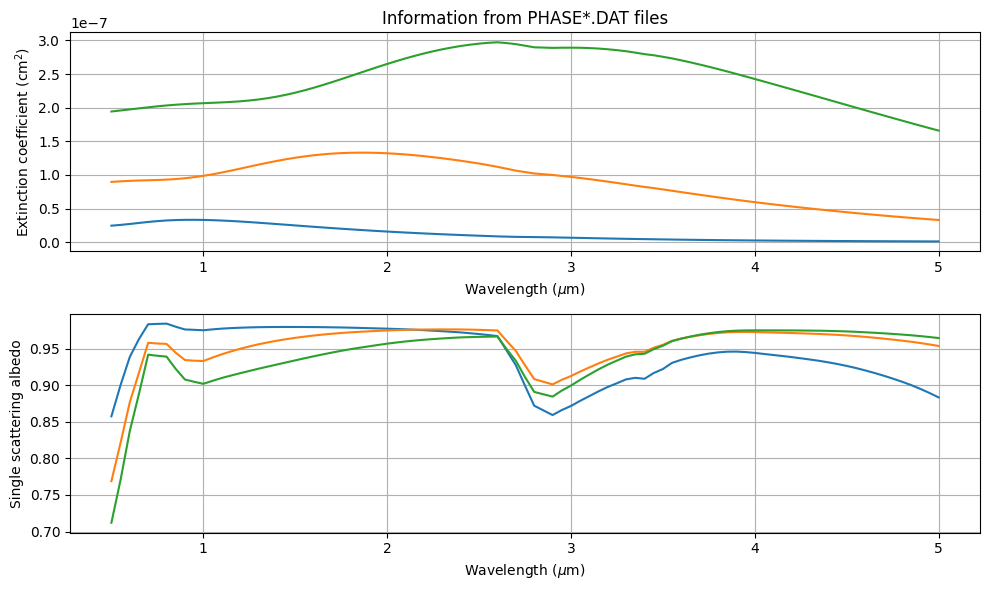

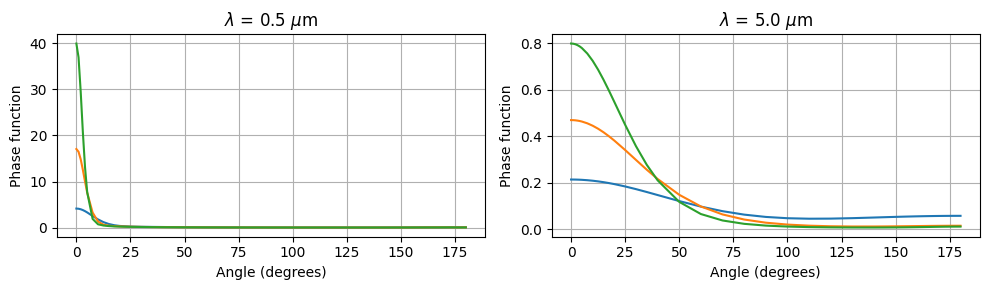

In [8]:
#Reading the information from the PHASE*.DAT files
Scatter = Scatter_0()
Scatter.read_phase(NDUST=3)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
for IDUST in range(Scatter.NDUST):
    ax1.plot(Scatter.WAVE,Scatter.KEXT[:,IDUST])
    ax2.plot(Scatter.WAVE,Scatter.SGLALB[:,IDUST])
ax1.grid()
ax2.grid()
ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Extinction coefficient (cm$^2$)')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax2.set_ylabel('Single scattering albedo')
ax1.set_title('Information from PHASE*.DAT files')
plt.tight_layout()


#Plotting the phase functions for two wavelengths
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))

iwave = 0
for IDUST in range(Scatter.NDUST):
    ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST])
ax1.set_title('$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
    
iwave = Scatter.NWAVE - 1
for IDUST in range(Scatter.NDUST):
    ax2.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST])
ax2.set_title('$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Phase function')
ax1.grid()
ax2.grid()
plt.tight_layout()


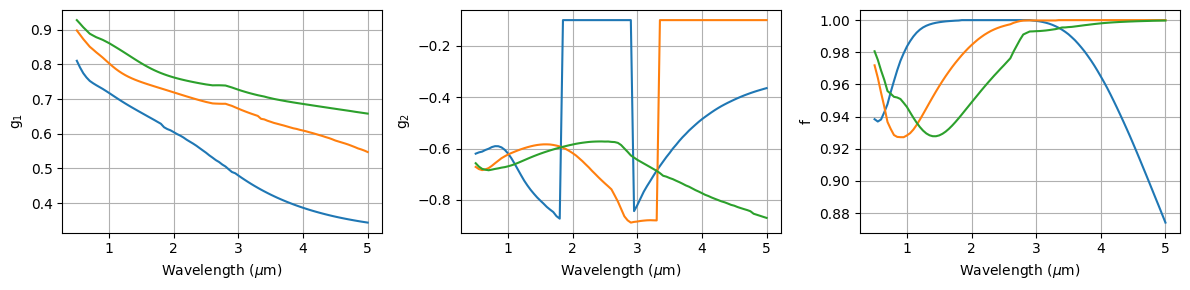

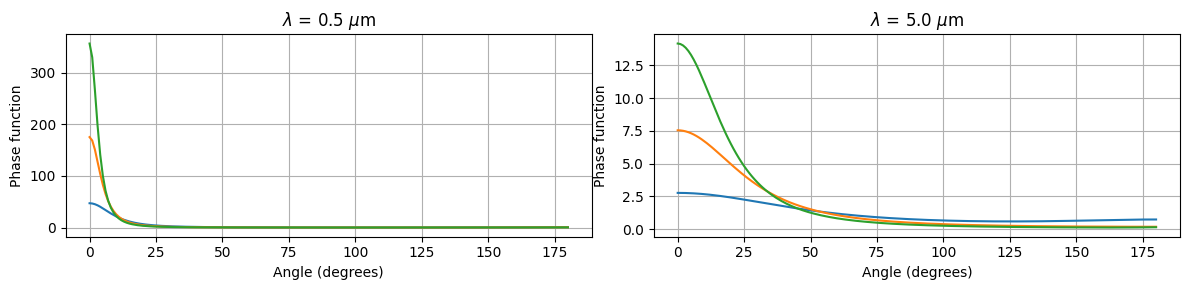

In [9]:
#Reading the information from the hgphase*.dat files
Scatter.read_hgphase(NDUST=3)

#Plotting the Henyey-Greenstein parameters
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,3))
for i in range(Scatter.NDUST):
    ax1.plot(Scatter.WAVE,Scatter.G1[:,i])
    ax2.plot(Scatter.WAVE,Scatter.G2[:,i])
    ax3.plot(Scatter.WAVE,Scatter.F[:,i])

ax1.set_xlabel('Wavelength ($\mu$m)')
ax2.set_xlabel('Wavelength ($\mu$m)')
ax3.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('g$_1$')
ax2.set_ylabel('g$_2$')
ax3.set_ylabel('f')
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()



#We can calculate the phase function too
Scatter.THETA = np.linspace(0.,180.,181)
Scatter.PHASE = Scatter.calc_hgphase(Scatter.THETA)



#Plotting the phase functions for two wavelengths
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3))

iwave = 0
for IDUST in range(Scatter.NDUST):
    ax1.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST])
ax1.set_title('$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')
    
iwave = Scatter.NWAVE - 1
for IDUST in range(Scatter.NDUST):
    ax2.plot(Scatter.THETA,Scatter.PHASE[iwave,:,IDUST])
ax2.set_title('$\lambda$ = '+str(Scatter.WAVE[iwave])+' $\mu$m')

ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Phase function')
ax2.set_xlabel('Angle (degrees)')
ax2.set_ylabel('Phase function')
ax1.grid()
ax2.grid()
plt.tight_layout()

## Writing the scattering properties into input files

Similarly, the user might want to generate the NEMESIS files for later using them on a retrieval. NemesisPy includes a set of routines to write the *.xsc*, the *hgphaseN.dat* and the *PHASEN.DAT* files. Below, you can see an example of how the NEMESIS files can be written using NemesisPy.

In [11]:
#Writing .xsc file
runname = 'write_test'
Scatter.write_xsc(runname)

#Writing hgphase.dat files
Scatter.write_hgphase()

#Writing PHASEx.DAT file
IDUST = 0
for IDUST in range(Scatter.NDUST):
    Scatter.write_phase(IDUST) #This will write the PHASE1.DAT file using the properties from the first population